In [1]:
%run common.ipy
from functions import get_raw_data, fix_col_names, Cleaner, get_final_data
from sklearn.dummy import DummyClassifier
import pickle

# Cargamos los Datos & EDA

In [2]:
X_train, X_test, y_train, y_test = get_final_data()

# Analysis

Esto es *italic* y esto es **bold**

- Go [here](analysis.ipynb) to see the analysis!
- See the [func](functions.py)
- See the [readme](README.md)

# Determinamos la Metrica

- accuracy
- precision
- recall
- f1
- auc

Voy a elegir **accuracy**

# Baseline Model

Es un modelo muy simple, si embargo nos da la predicción. Compararemos los demas modelos a este!

In [3]:
pd.Series(y_train).value_counts(normalize=True)

0    0.627517
1    0.372483
dtype: float64

¿Que pasaria si usamos un modelo simple o un modelo base?

¿Cual seria mi 'accuracy'?

In [4]:
accuracy_score(y_train, np.zeros(596))

0.62751677852349

In [5]:
dc = DummyClassifier(strategy='uniform').fit(X_train, y_train)
yhat_dc = dc.predict(X_train)

In [6]:
accuracy_score(y_train, yhat_dc), precision_score(y_train, yhat_dc), recall_score(y_train, yhat_dc)

(0.4815436241610738, 0.36936936936936937, 0.5540540540540541)

# Construir modelos predeterminados

In [7]:
candidates = [KNeighborsClassifier, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, xgb.XGBClassifier]

In [8]:
%%capture
accuracies = np.zeros(len(candidates))
for i, Model in enumerate(candidates):
    model = Model().fit(X_train, y_train)
    yhat = model.predict(X_test)
    score = accuracy_score(y_test, yhat)
    accuracies[i] = score

<Figure size 432x288 with 1 Axes>

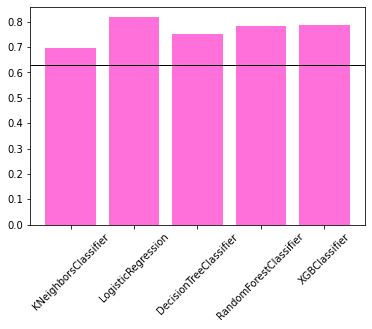

In [9]:
plt.bar([c.__name__ for c in candidates], accuracies, color='#ff33cc', alpha=0.7)
plt.axhline(y=0.63, linewidth=1, color='k')
plt.xticks(rotation=45);

# GridSearch

- [Decison Tree](gs_dt.ipynb)
- Logistic Regression
- KNN
- Random Forest
- XGBoost


# Construir modelo final

In [10]:
hyperparams = {
        'criterion': 'entropy',
        'max_depth': 10,
        'max_features': 'log2',
        'min_samples_split': 5
        }

model = DecisionTreeClassifier(**hyperparams).fit(X_train, y_train)

# Elija Umbral

In [11]:
metrics = pd.DataFrame(np.zeros((100,3)), columns=['accuracy', 'precision', 'recall'])
thresholds = range(100)
for t in thresholds:
    yhat = model.predict_proba(X_test)[:,1] > (t/100)
    metrics.iloc[t] = accuracy_score(y_test, yhat), precision_score(y_test, yhat), recall_score(y_test, yhat)

<Figure size 864x504 with 1 Axes>

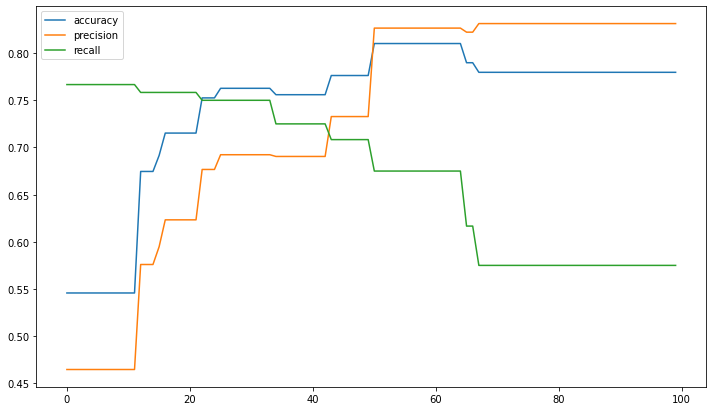

In [12]:
metrics.plot(figsize=(12, 7));

# Evaluar modelo final

- Parece que somos 17% más altas que la línea de base, ¡buen trabajo!

In [13]:
model.score(X_test, y_test)

0.8101694915254237

# Modelo de explicación

<Figure size 432x288 with 1 Axes>

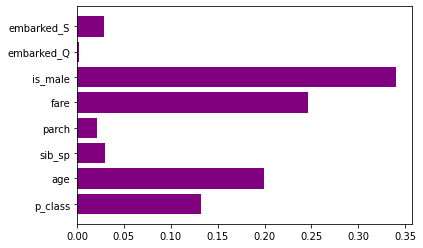

In [14]:
plt.barh(X_test.columns, model.feature_importances_, color='purple');

# Modelo de producción

In [15]:
with open('model.p', 'wb') as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

In [16]:
with open('model.p', 'rb') as f:
    reanimated = pickle.load(f)

In [17]:
model.score(X_test, y_test)

0.8101694915254237

In [18]:
reanimated.score(X_test, y_test)

0.8101694915254237